# **LetsGrowMore Virtual Internship Program (VIP) - August 2022**


## **More Advanced Level**

## **Task-10 : ML Facial Recognition To Detect Mood And Suggest Songs Accordingly**

## **Name: Jagdish Ramesh Parihar**

In [ ]:
# Importing Libraries For The Model
import tensorflow
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from IPython.display import Audio
from skimage.io import imread
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Loading The Dataset
doc_train=r"C:\Users\rishi\Desktop\LGM_VIP\More Advanced Level Tasks\Task-10_MoodBasedSongRecommender\train"
doc_test=r"C:\Users\rishi\Desktop\LGM_VIP\More Advanced Level Tasks\Task-10_MoodBasedSongRecommender\test"
r,c=48,48
moods=7
def mood_counter(direc,ind):
    mood_dict={}
    for i in os.listdir(direc):
        d=direc+"/"+i
        mood_dict[i]=len(os.listdir(d))
    data=pd.DataFrame(mood_dict,index=[ind])
    return data
counter_trainset=mood_counter(doc_train,'train')
print("THE DIFFERENT EMOTIONS/MOODS IN TRAIN & TEST SET")
print("------------------------------------------------------------------------------------------------")
print(counter_trainset)
counter_testset=mood_counter(doc_test,'test')
print(counter_testset)

THE DIFFERENT EMOTIONS/MOODS IN TRAIN & TEST SET
------------------------------------------------------------------------------------------------
       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


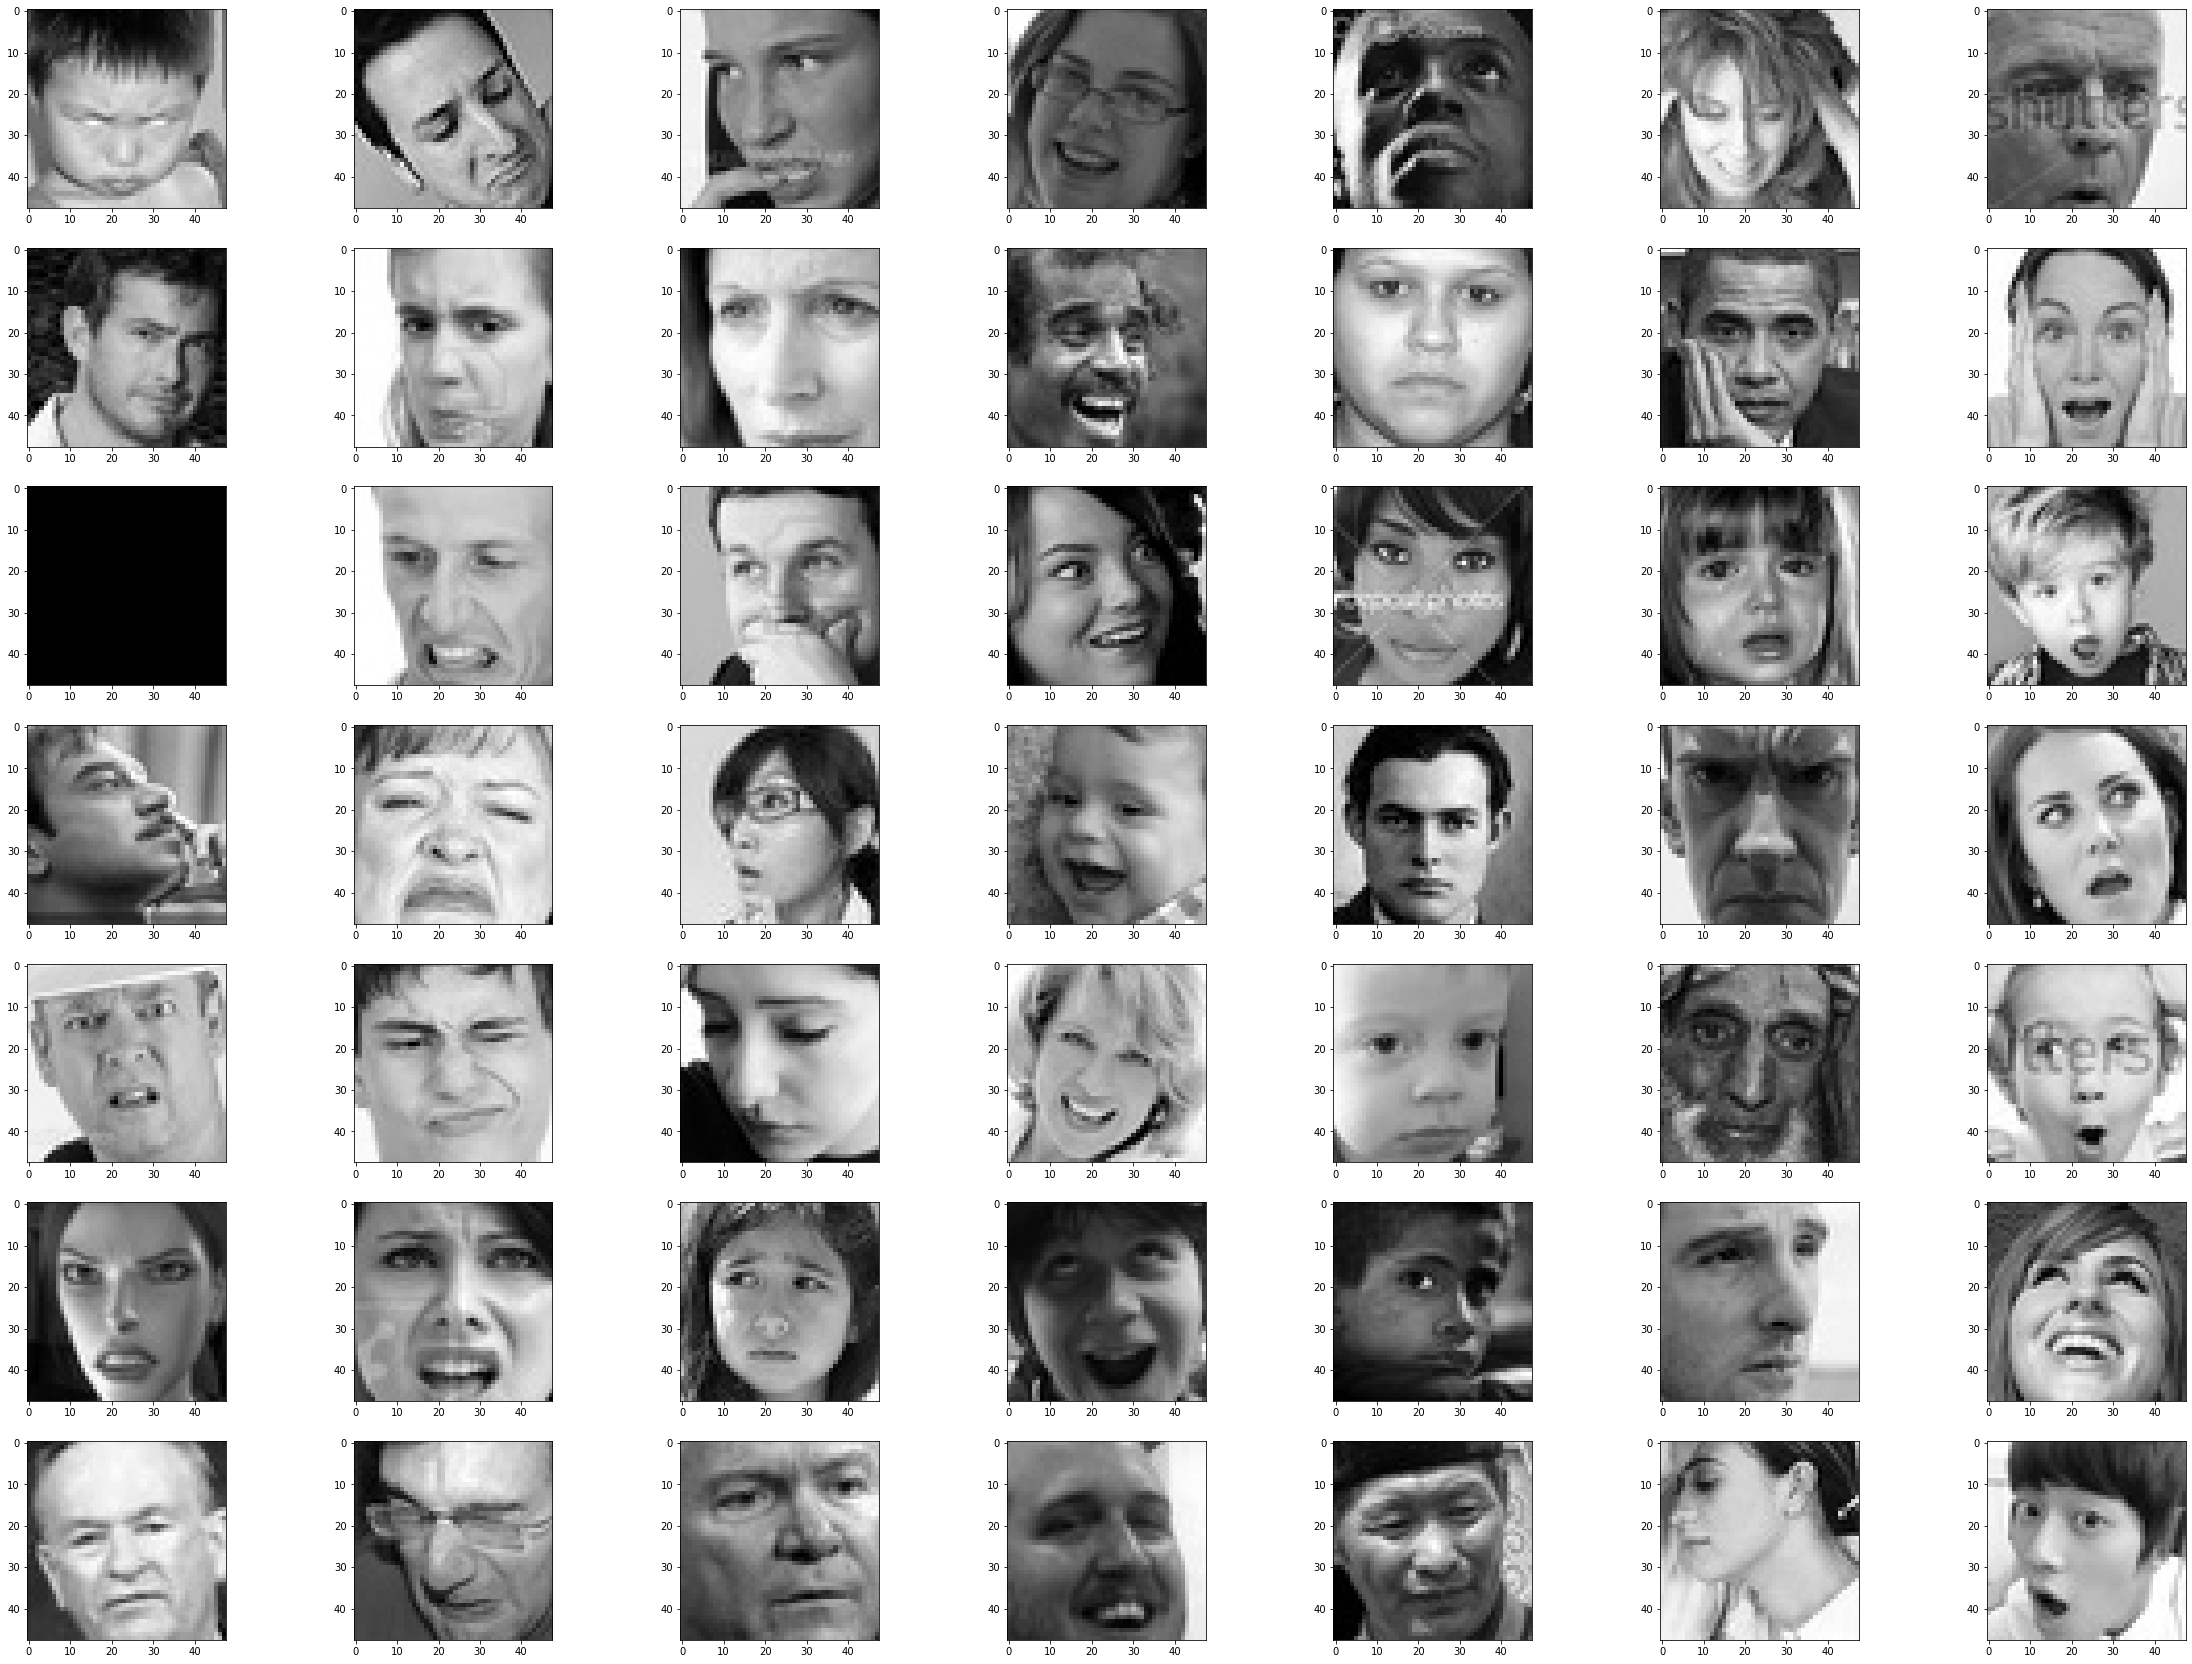

In [ ]:
# Visual Representation Of The Dataset
train_tot=len(os.listdir(doc_train))
doc_train="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\train\\"
doc_test="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\test\\"
figure,axplot=plt.subplots(nrows=7,ncols=train_tot,figsize=(40,30))
for i in range(7):
    for j,k in zip(range(train_tot),os.listdir(doc_train)):
        axplot[i][j].imshow(imread(doc_train+k+"/"+os.listdir(doc_train+k)[i]),cmap='gray')
plt.show()

In [ ]:
# Arranging The Dataset On The Most Frequent Mood\Emotion
data={}
for i in os.listdir(doc_train):
    direct=doc_train+i
    data[i]=len(os.listdir(direct))
data=pd.DataFrame(data,index=["total"]).transpose().sort_values("total",ascending=False)

In [ ]:
# Extracting Images From The Happy Folder
mood_happy=os.listdir(doc_train+"happy/")
d1=[]
d2=[]
for i in mood_happy:
    img=imread(doc_train+'happy/'+i)
    d_img1,d_img2=img.shape
    d1.append(d_img1)
    d2.append(d_img2)
shape_image=(int(np.mean(d1)),int(np.mean(d2)),1)

In [ ]:
# Preprocessing The Dataset
train=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test=ImageDataGenerator(rescale=1/255)
shape_image=(int(np.mean(d1)),int(np.mean(d2)),1)
gen_train=train.flow_from_directory(directory=doc_train,target_size=(shape_image[0],shape_image[1]),color_mode='grayscale',batch_size=64,class_mode='categorical',shuffle=True)
gen_test=test.flow_from_directory(directory=doc_test,target_size=(shape_image[0],shape_image[1]),color_mode='grayscale',batch_size=64,class_mode='categorical',shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Making The CNN Model
cnn=Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=shape_image))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=len(os.listdir(doc_train)),activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 128)      

In [ ]:
# Training The CNN Model On The Training Set
cnn.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
ep_step=gen_train.n//gen_train.batch_size
val_step=gen_test.n//gen_test.batch_size
ep_num=20
cnn.fit(gen_train,epochs=ep_num,verbose=1,validation_data=gen_test,steps_per_epoch=ep_step,validation_steps=val_step)

Epoch 1/20
448/448 [==============================] - 481s 1s/step - loss: 1.8545 - accuracy: 0.2283 - val_loss: 2.2309 - val_accuracy: 0.2461
Epoch 2/20
448/448 [==============================] - 495s 1s/step - loss: 1.7989 - accuracy: 0.2484 - val_loss: 1.7720 - val_accuracy: 0.2665
Epoch 3/20
448/448 [==============================] - 482s 1s/step - loss: 1.7902 - accuracy: 0.2525 - val_loss: 1.7344 - val_accuracy: 0.2995
Epoch 4/20
448/448 [==============================] - 480s 1s/step - loss: 1.7743 - accuracy: 0.2645 - val_loss: 1.7110 - val_accuracy: 0.3037
Epoch 5/20
448/448 [==============================] - 474s 1s/step - loss: 1.7549 - accuracy: 0.2794 - val_loss: 1.6550 - val_accuracy: 0.3218
Epoch 6/20
448/448 [==============================] - 472s 1s/step - loss: 1.7307 - accuracy: 0.2937 - val_loss: 1.5975 - val_accuracy: 0.3500
Epoch 7/20
448/448 [==============================] - 487s 1s/step - loss: 1.7026 - accuracy: 0.3121 - val_loss: 1.5884 - val_accuracy: 0.3707

In [ ]:
# Saving The Model As A File & Analysing The Accuracy
cnn.save("cnn.h5")
loss,accuracy=cnn.evaluate(gen_test)
print("Accuracy Of Model: ",str(accuracy*100)+"%")

113/113 [==============================] - 14s 123ms/step - loss: 1.1792 - accuracy: 0.5425
Accuracy Of Model:  54.24909591674805%


In [ ]:
# Finding The Report Measures Of The Model
from sklearn.metrics import classification_report
Y_pred=np.argmax(cnn.predict(gen_test),axis=-1)
print(classification_report(gen_test.classes,Y_pred,target_names=gen_test.class_indices.keys()),end='\n\n\n')

              precision    recall  f1-score   support

       angry       0.38      0.54      0.45       958
     disgust       0.00      0.00      0.00       111
        fear       0.48      0.12      0.19      1024
       happy       0.76      0.84      0.80      1774
     neutral       0.42      0.67      0.52      1233
         sad       0.46      0.28      0.35      1247
    surprise       0.65      0.71      0.68       831

    accuracy                           0.54      7178
   macro avg       0.45      0.45      0.43      7178
weighted avg       0.54      0.54      0.51      7178





C:\Users\rishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


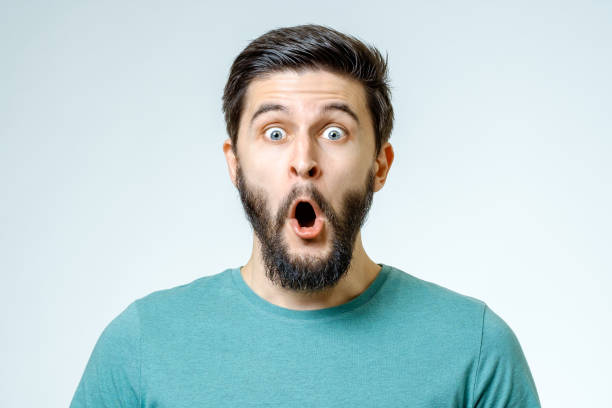

In [ ]:
# Testing The CNN Model With A Random Sample Image
im=cv2.imread("surp_img.jpg")
from IPython.display import Image
Image(filename="surp_img.jpg")

In [ ]:
from tensorflow.keras.models import load_model
cnn=tensorflow.keras.models.load_model("cnn.h5",custom_objects={"Functional":tensorflow.keras.models.Model})
moods=['Angry','Disgust','Happy','Sad','Surprise',"Neutral"]
image=im
fr=cv2.resize(image,(48,48),interpolation=cv2.INTER_BITS2)
gr=cv2.cvtColor(fr,cv2.COLOR_BGR2GRAY)/255.0
gr=gr.reshape(1,48,48,1)
predict=cnn.predict(gr)[0]
lab=moods[predict.argmax()]
for (i,j) in zip(range(7),moods):
    pre=predict[i]
    print("{:^10s}".format(j)+"Prediction Rate -> {0:.2f}%".format(pre))
print("\n\n The Model Finds The Picture -> ",lab)

  Angry   Prediction Rate -> 0.13%
 Disgust  Prediction Rate -> 0.02%
  Happy   Prediction Rate -> 0.08%
   Sad    Prediction Rate -> 0.30%
 Surprise Prediction Rate -> 0.28%
 Neutral  Prediction Rate -> 0.17%


 The Model Finds The Picture ->  Sad


In [ ]:
if(lab=="Angry"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Angry"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Angry\\"+ran,autoplay=True)
    display(music)
elif(lab=="Happy"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Happy"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Happy\\"+ran,autoplay=True)
    display(music)
elif(lab=="Sad"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Sad"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Sad\\"+ran,autoplay=True)
    display(music)
elif(lab=="Disgust"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Disgust"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Disgust\\"+ran,autoplay=True)
    display(music)
elif(lab=="Surprise"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Surprise"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Surprise\\"+ran,autoplay=True)
elif(lab=="Neutral"):
    p="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Neutral"
    songs=os.listdir(p)
    ran=random.choice(songs)
    print("The System Suggests The Song For You->",ran)
    music=Audio(filename="C:\\Users\\rishi\\Desktop\\LGM_VIP\\More Advanced Level Tasks\\Task-10_MoodBasedSongRecommender\\Neutral\\"+ran,autoplay=True)




The System Suggests The Song For You-> Lindsey Stirling - Carol of the Bells (Official Music Video).mp3
